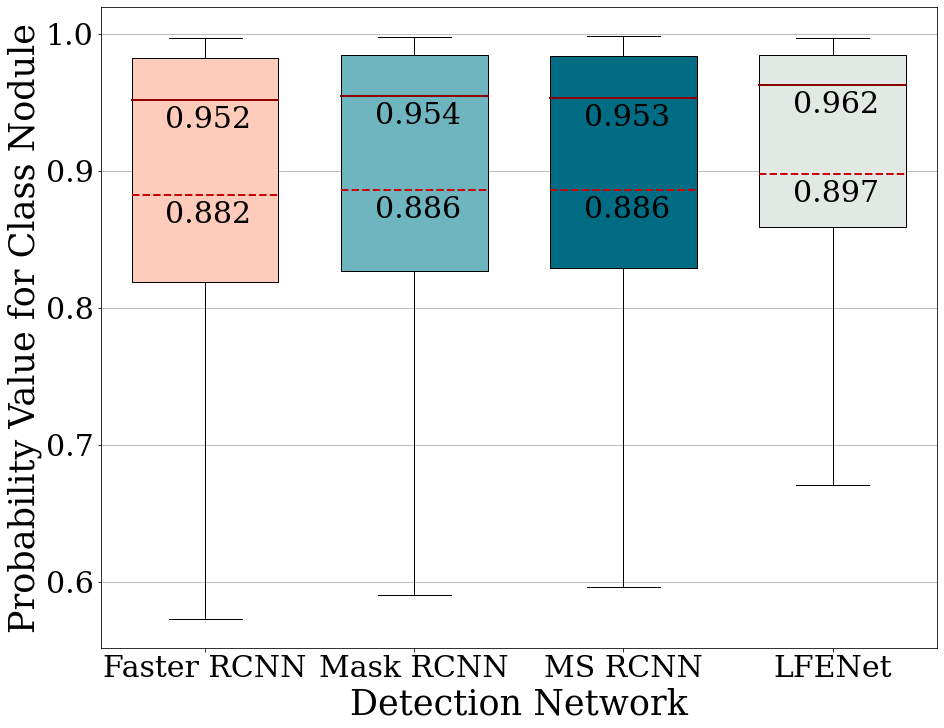

In [1]:
#coding=utf-8
import re
import matplotlib.pyplot as plt
import numpy as np


# 正则表达式取log文件中需要的值
def readlog(log_fn):
    time = []
    with open(log_fn, 'r') as f:
        lines = f.readlines()
        # print(len(lines))
        # temp = re.search(', time: (\d+(\.\d+)?),', lines[20])
        # print("temp:", temp.group(1))
        for line in lines:
            if re.search(', time: (.*?),', line):
                temp = re.search(', time: (.*?),', line)
                # print("temp:", temp.group(1))
                time.append(float(temp.group(1))/2)

        # print(time)
        # print(len(time))

    return np.array(time)

# 正则表达式取log文件中需要的值
def readinferencelog(log_fn, prefix):
    n = []
    b = []
    with open(log_fn, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if re.search(prefix + ':(.*?)', line):
                if float(line.split(':')[1]) > 0.5:
                    n.append(float(line.split(':')[1]))
                else: 
                    b.append(1-float(line.split(':')[1]))
    return np.array(n), np.array(b), 



if __name__ == "__main__":
    # 读取文件数值
    
#     log_fn = r"logs/cls.log"
    log_fn = r"logs/processInference-Proposal.log"
    n1, b1 = readinferencelog(log_fn, 'faster')
    n2, b2 = readinferencelog(log_fn, 'mask')
    n3, b3 = readinferencelog(log_fn, 'ms')
    n4, b4 = readinferencelog(log_fn, 'xiaohei')
#     print(time9)
    # 柱状图
    labels = ['Faster RCNN', 'Mask RCNN', 'MS RCNN', 'LFENet']

    width = 0.7  # the width of the bars
    red_square = dict(color='#8C0004', linewidth=2)
    green_square = dict(color='#C8000A', linestyle='dashed', linewidth=2)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

    fig, ax1 = plt.subplots(figsize=(13,10), constrained_layout=True)
    # rectangular box plot
    bplot1 = ax1.boxplot([n1.T, n2.T, n3.T, n4.T],
#                     notch=True,  # notch shape
                         widths=width,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                         showfliers=False,
                     labels=labels,
                         showmeans=True,
                        autorange=True,
                        medianprops=red_square,
                        meanprops=green_square,
                        meanline=True)  # will be used to label x-ticks
#     ax1.set_title('Rectangular box plot')
    # notch shape box plot

#     bplot2 = ax2.boxplot([b1.T, b2.T, b3.T, b4.T],
#                      notch=True,  # notch shape
#                      vert=True,  # vertical box alignment
#                          widths=width,
#                      patch_artist=True,  # fill with color
#                          showfliers=False,
#                      labels=labels)  # will be used to label x-ticks
#     ax2.set_title('Notched box plot')
    colors = ['#FFCCBB', '#6EB5C0', '#006C84', '#E2E8E4']
#         colors = ['#505160', '#68829E', '#AEBD38', '#598234']
    for patch, color in zip(bplot1['boxes'], colors):
            patch.set_facecolor(color)

    ax1.yaxis.grid(True)
    ax1.tick_params(labelsize=30)
    ax1.set_xlabel('Detection Network', fontsize=35, variant='small-caps')
    ax1.set_ylabel('Probability Value for Class Nodule', fontsize=35)
    for d, l in zip(labels, bplot1['medians']):
        ax1.text(l.get_xdata()[0] + 0.16, l.get_ydata()[0] - 0.02, "%.3f" % l.get_ydata()[0],  fontsize=30, style='normal')
    for d, l in zip(labels, bplot1['means']):
        ax1.text(l.get_xdata()[0] + 0.16, l.get_ydata()[0] - 0.02, "%.3f" % l.get_ydata()[0],  fontsize=30, style='normal')
#     ax1.legend(fontsize=13)
#     print(bplot1['medians'].get_ydata)
#     print(bplot1['means'])
#     plt.savefig("logs/different_cls.png")
    plt.savefig('logs/different_cls.eps', format='eps', dpi=1000)
    

    plt.show()